This Jupyter Notebook goes through the stages required in Python to:
- Import share data from the internet
- Calculate fast and slow stochastic oscillators using the Ta-Lib package
- Plot the stochastic oscillators

In [1]:
# Import required modules
import talib
import pandas as pd
import numpy as np
from datetime import datetime
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import share data
start = datetime(1988,7,1)
end = datetime(2022,6,1)
pdr_bae_data = pdr.DataReader("BA.L",'yahoo',start,end)

In [3]:
#Configure and calculate the stochastic oscillators
fastk_per = 14
fastd_per = 3
slowk_per = 3
slowd_per = 3

pdr_bae_data['FastK'], pdr_bae_data['FastD'] = talib.STOCHF(pdr_bae_data['High'].values, pdr_bae_data['Low'].values,
                                pdr_bae_data['Close'].values, fastk_period = fastk_per, fastd_period = fastd_per)

pdr_bae_data['SlowK'], pdr_bae_data['SlowD'] = talib.STOCH(pdr_bae_data['High'].values, pdr_bae_data['Low'].values,
                                pdr_bae_data['Close'].values, fastk_period = fastk_per, slowk_period = slowk_per,
                                                            slowd_period = slowd_per)

pdr_bae_data

,High,Low,Open,Close,Volume,Adj Close,FastK,FastD,SlowK,SlowD
Date,,,,,,,,,,
1988-07-01,100.918602,100.918602,100.918602,100.918602,0.0,34.474159,NaN,NaN,NaN,NaN
1988-07-04,100.918602,100.918602,100.918602,100.918602,0.0,34.474159,NaN,NaN,NaN,NaN
1988-07-05,102.384804,102.384804,102.384804,102.384804,0.0,34.975010,NaN,NaN,NaN,NaN
1988-07-06,100.674301,100.674301,100.674301,100.674301,0.0,34.390705,NaN,NaN,NaN,NaN
1988-07-07,98.963799,98.963799,98.963799,98.963799,0.0,33.806381,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-05-26,771.000000,763.000000,763.000000,771.000000,5179317.0,771.000000,88.000044,83.691424,83.691424,75.454521
2022-05-27,777.400024,766.200012,768.000000,766.799988,6744046.0,766.799988,80.363659,81.696999,81.696999,80.755335
2022-05-30,772.400024,758.599976,766.000000,761.599976,8815339.0,761.599976,70.909091,79.757598,79.757598,81.715341


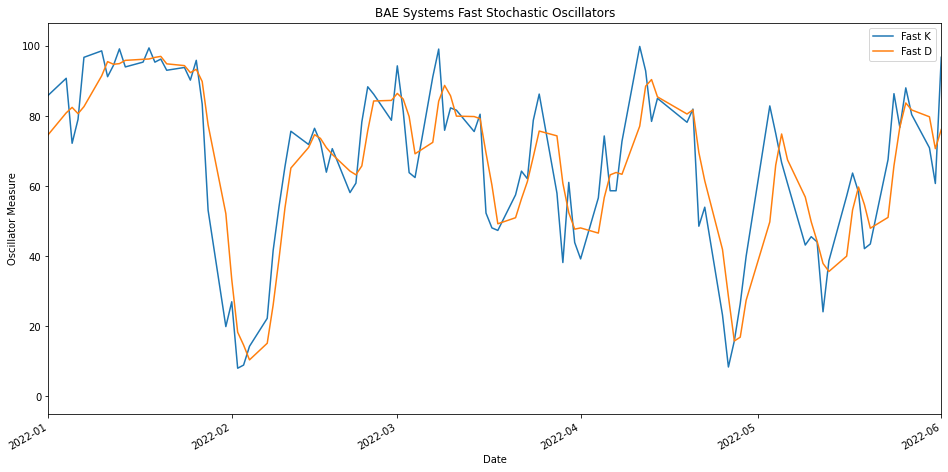

In [4]:
#Plot Fast Stochastic Oscillators
pdr_bae_data['FastK'].plot(label='Fast K',figsize=(16,8))
pdr_bae_data['FastD'].plot(label='Fast D')

_=plt.xlabel('Date')
_=plt.ylabel('Oscillator Measure')
_=plt.title('BAE Systems Fast Stochastic Oscillators')
plt.xlim(datetime(2022,1,1),end) #start x-axis at the start of 2022 so the different series are discernible
plt.legend();

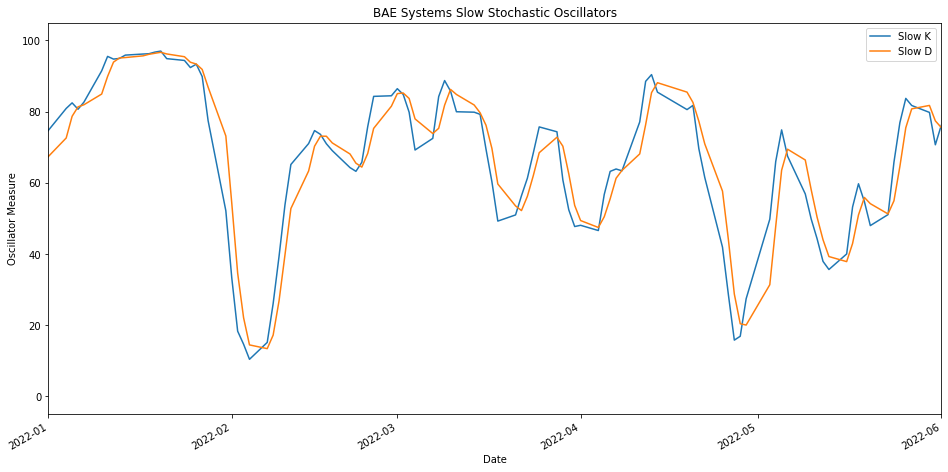

In [5]:
#Plot slow Stochastic Oscillators
pdr_bae_data['SlowK'].plot(label='Slow K',figsize=(16,8))
pdr_bae_data['SlowD'].plot(label='Slow D')

_=plt.xlabel('Date')
_=plt.ylabel('Oscillator Measure')
_=plt.title('BAE Systems Slow Stochastic Oscillators')
plt.xlim(datetime(2022,1,1),end) #start x-axis at the start of 2022 so the different series are discernible
plt.legend();